In [3]:
import pandas as pd

# Loading The Predicted Emotion Files

In [8]:
a1_upper={}
for i in range(1,31):
  a1_upper[f'a1_dfu{i}']=pd.read_csv(f'/content/Predicted Emotion/approach-1/df{i}_mergedu.csv')

a1_middle={}
for i in range(1,31):
  a1_middle[f'a1_dfm{i}']=pd.read_csv(f'/content/Predicted Emotion/approach-1/df{i}_mergedm.csv')

a1_lower={}
for i in range(1,31):
  a1_lower[f'a1_dfl{i}']=pd.read_csv(f'/content/Predicted Emotion/approach-1/df{i}_mergedl.csv')

In [9]:
a2_upper={}
for i in range(1,31):
  a2_upper[f'a2_dfu{i}']=pd.read_csv(f'/content/Predicted Emotion/approach-2/upper//df{i}_mergedu.csv')

a2_middle={}
for i in range(1,31):
  a2_middle[f'a2_dfm{i}']=pd.read_csv(f'/content/Predicted Emotion/approach-2/middle/df{i}_mergedm.csv')

a2_lower={}
for i in range(1,31):
  a2_lower[f'a2_dfl{i}']=pd.read_csv(f'/content/Predicted Emotion/approach-2/lower//df{i}_mergedl.csv')

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the emotions and split them into two groups
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire',
            'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
            'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise',
            'neutral']

first_palette_emotions = emotions[:20]
second_palette_emotions = emotions[20:]

# Define the two color palettes
first_palette = plt.cm.get_cmap('tab20', len(first_palette_emotions))
second_palette = plt.cm.get_cmap('tab10', len(second_palette_emotions))

def bar_chart(dic, num):
    df = dic[num].copy()
    df['CumulativeTimeTaken'] = (df['TimeTaken'].cumsum()) / 60
    emotion_counts = df['emotion'].value_counts()

    # Assign colors to the emotions based on the two color palettes
    colors = []
    for emotion in emotion_counts.index:
        if emotion in first_palette_emotions:
            color = first_palette(first_palette_emotions.index(emotion))
        else:
            color = second_palette(second_palette_emotions.index(emotion))
        colors.append(color)

    # Plot the pie chart
    patches, _, percent_text = plt.pie(emotion_counts.values, labels=emotion_counts.index, colors=colors, autopct='%1.1f%%')

    # Change the font size of the percentage values
    for text in percent_text:
        text.set_fontsize(5)
        text.set_color('black')

    plt.title('Emotion Distribution')
    plt.axis('equal')
    plt.show()


<ipython-input-10-043e419fd0ed>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  first_palette = plt.cm.get_cmap('tab20', len(first_palette_emotions))
<ipython-input-10-043e419fd0ed>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  second_palette = plt.cm.get_cmap('tab10', len(second_palette_emotions))


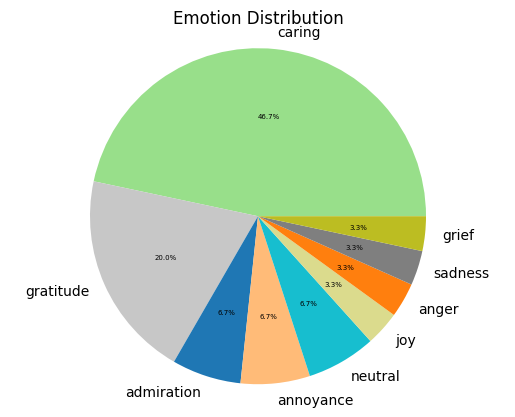

In [11]:
bar_chart(a1_upper,'a1_dfu17')

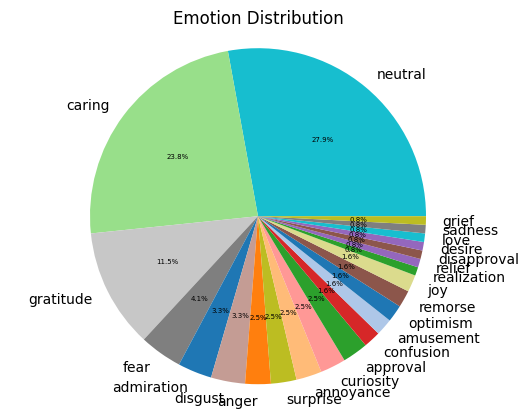

In [12]:
bar_chart(a2_upper,'a2_dfu17')

In [13]:
import matplotlib.pyplot as plt

def time_series_graph(dic, num):
    emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire',
                'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
                'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise',
                'neutral']

    # Copy the DataFrame to avoid modifying the original data
    df = dic[num].copy()

    # Calculate cumulative time in minutes
    df['CumulativeTimeTaken'] = df['TimeTaken'].cumsum() / 60

    # Assign a color to each emotion
    colors = plt.cm.get_cmap('tab20', len(emotions))

    # Create the scatter plot
    scatter = plt.scatter(df['CumulativeTimeTaken'], [emotions.index(emotion) for emotion in df['emotion']],
                          c=df['emotion'].map(lambda x: colors(emotions.index(x))))

    # Set the y-axis tick positions and labels
    plt.yticks(range(len(emotions)), emotions)

    # Connect consecutive nodes with lines
    for i in range(len(df) - 1):
        plt.plot([df['CumulativeTimeTaken'].iloc[i], df['CumulativeTimeTaken'].iloc[i + 1]],
                 [emotions.index(df['emotion'].iloc[i]), emotions.index(df['emotion'].iloc[i + 1])],
                 color='gray', linestyle='-', alpha=0.1)

    plt.xlabel('Cumulative Time Taken')
    plt.ylabel('Emotion')
    plt.title('Emotion Scatter Plot')

    # Create a legend for the emotions and move it outside the graph
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=emotion,
                                  markerfacecolor=colors(emotions.index(emotion))) for emotion in emotions]
    legend = plt.legend(handles=legend_elements, title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust the plot layout to accommodate the legend outside the graph
    plt.subplots_adjust(right=0.75)

    plt.show()

<ipython-input-13-716770cb4f17>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(emotions))


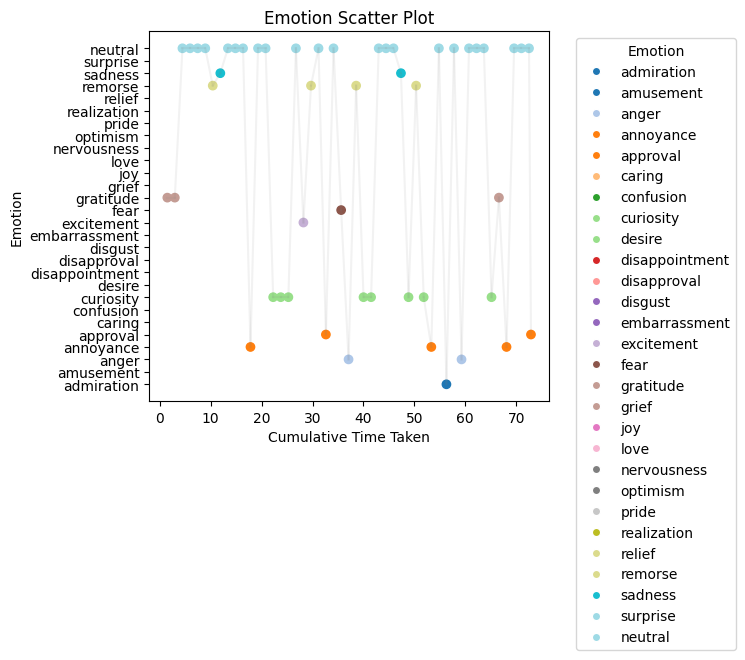

In [14]:
time_series_graph(a1_upper,'a1_dfu1')

<ipython-input-13-716770cb4f17>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(emotions))


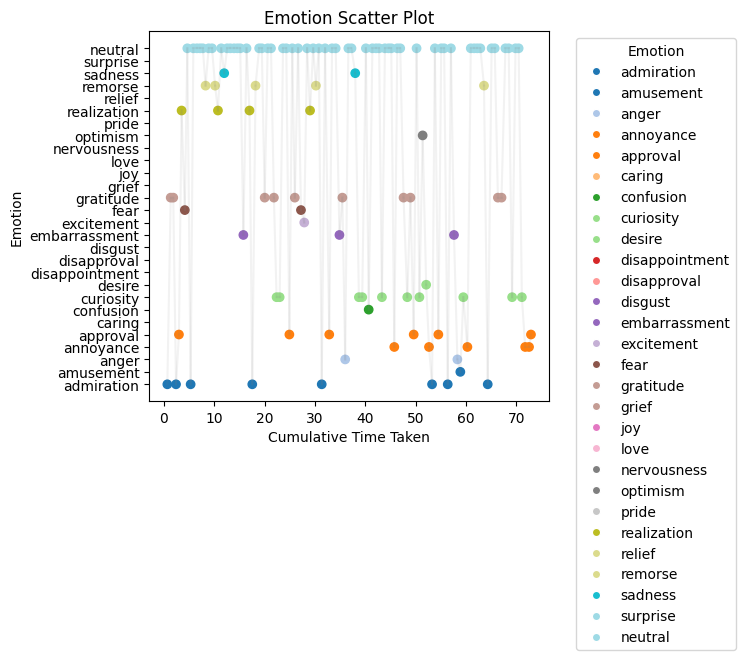

In [15]:
time_series_graph(a2_upper,'a2_dfu1')

In [17]:
a1_df_movies  = pd.read_excel('/content/Predicted Emotion/approach-1/movienames.xlsx') # change path if needed
a2_df_movies  = pd.read_excel('/content/Predicted Emotion/approach-1/movienames.xlsx') # change path if needed

In [18]:
a1_emotionlist=[]
for i in range(30):
  a1_emotionlist.append(list(a1_upper[f'a1_dfu{i+1}'].emotion))
for i in range(30):
  a1_emotionlist.append(list(a1_middle[f'a1_dfm{i+1}'].emotion))
for i in range(30):
  a1_emotionlist.append(list(a1_lower[f'a1_dfl{i+1}'].emotion))

In [19]:
a2_emotionlist=[]
for i in range(30):
  a2_emotionlist.append(list(a2_upper[f'a2_dfu{i+1}'].emotion))
for i in range(30):
  a2_emotionlist.append(list(a2_middle[f'a2_dfm{i+1}'].emotion))
for i in range(30):
  a2_emotionlist.append(list(a2_lower[f'a2_dfl{i+1}'].emotion))

In [20]:
a1_df_movies['emotions'] = a1_emotionlist
a2_df_movies['emotions'] = a2_emotionlist

#Making Emotion pairs


In [21]:
from collections import Counter
def emotion_pair(df):
  #most5=[]
  emopair = []
  for i in range(len(df)):
    predicted_emotions = df['emotions'][i]
    # Count the occurrences of consecutive emotion pairs
    emotion_counts = Counter(zip(predicted_emotions, predicted_emotions[1:]))
    emopair.append(dict(emotion_counts))
    most_common_emotion_pairs = emotion_counts.most_common(5)
    #most5.append(most_common_emotion_pairs)
  df['emopair'] = emopair
  return df

def different_emotion_pair(df):
    #most5 = []
    emopair = []

    for i in range(len(df)):
        predicted_emotions = df['emotions'][i]
        # Get only the pairs with different emotions
        different_emotion_pairs = [pair for pair in zip(predicted_emotions, predicted_emotions[1:]) if pair[0] != pair[1] and 'neutral' not in pair]
        # Count the occurrences of different emotion pairs
        emotion_counts = Counter(different_emotion_pairs)
        emopair.append(dict(emotion_counts))
        most_common_emotion_pairs = emotion_counts.most_common(5)
        #most5.append(most_common_emotion_pairs)

    df['diffemopair'] = emopair
    #df['most occurring 5 different emotion pairs'] = most5
    return df

In [22]:
emotion_pair(a1_df_movies).head()
different_emotion_pair(a1_df_movies).head()

,movie,release year,id,genre,director,box_office,runtime(in min),IMDb rating,emotions,emopair,diffemopair
0,12 Angry Men,1957,dfu1,"Crime, Drama",Sidney Lumet,2,96,9.0,"[gratitude, gratitude, neutral, neutral, neutr...","{('gratitude', 'gratitude'): 1, ('gratitude', ...","{('remorse', 'sadness'): 1, ('excitement', 're..."
1,Cidade.De.Deus.(aka.City.of.God),2002,dfu2,"Crime, Drama","Fernando Meirelles, Kátia Lund",30.6,130,8.6,"[anger, anger, anger, anger, anger, fear, cari...","{('anger', 'anger'): 14, ('anger', 'fear'): 1,...","{('anger', 'fear'): 1, ('fear', 'caring'): 1, ..."
2,Fight Club,1999,dfu3,Drama,David Fincher,101.2,139,8.8,"[realization, neutral, gratitude, grief, sadne...","{('realization', 'neutral'): 1, ('neutral', 'g...","{('gratitude', 'grief'): 1, ('grief', 'sadness..."
3,Forrest Gump,1994,dfu4,"Drama, Romance",Robert Zemeckis,678.2,142,8.8,"[desire, neutral, neutral, gratitude, amusemen...","{('desire', 'neutral'): 1, ('neutral', 'neutra...","{('gratitude', 'amusement'): 2, ('amusement', ..."
4,Goodfellas,1990,dfu5,"Biography, Crime, Drama",Martin Scorsese,47.1,146,8.7,"[anger, neutral, anger, neutral, admiration, g...","{('anger', 'neutral'): 4, ('neutral', 'anger')...","{('admiration', 'gratitude'): 2, ('gratitude',..."


In [23]:
emotion_pair(a2_df_movies).head()
different_emotion_pair(a2_df_movies).head()

,movie,release year,id,genre,director,box_office,runtime(in min),IMDb rating,emotions,emopair,diffemopair
0,12 Angry Men,1957,dfu1,"Crime, Drama",Sidney Lumet,2,96,9.0,"[admiration, gratitude, gratitude, admiration,...","{('admiration', 'gratitude'): 1, ('gratitude',...","{('admiration', 'gratitude'): 1, ('gratitude',..."
1,Cidade.De.Deus.(aka.City.of.God),2002,dfu2,"Crime, Drama","Fernando Meirelles, Kátia Lund",30.6,130,8.6,"[anger, anger, caring, anger, anger, optimism,...","{('anger', 'anger'): 20, ('anger', 'caring'): ...","{('anger', 'caring'): 2, ('caring', 'anger'): ..."
2,Fight Club,1999,dfu3,Drama,David Fincher,101.2,139,8.8,"[realization, anger, neutral, neutral, caring,...","{('realization', 'anger'): 2, ('anger', 'neutr...","{('realization', 'anger'): 2, ('caring', 'grat..."
3,Forrest Gump,1994,dfu4,"Drama, Romance",Robert Zemeckis,678.2,142,8.8,"[desire, neutral, neutral, neutral, admiration...","{('desire', 'neutral'): 1, ('neutral', 'neutra...","{('gratitude', 'amusement'): 1, ('amusement', ..."
4,Goodfellas,1990,dfu5,"Biography, Crime, Drama",Martin Scorsese,47.1,146,8.7,"[anger, love, joy, neutral, anger, anger, neut...","{('anger', 'love'): 2, ('love', 'joy'): 1, ('j...","{('anger', 'love'): 2, ('love', 'joy'): 1, ('a..."


# Functions to get Emotion pairs: Genres and Category Wise

In [24]:
# Filter DataFrame based on the "romance" genre
def genre_dict_emopair(df, genre_name):
  df_genre = df[df['genre'].str.contains(genre_name, case=False)]
  df_genre = df_genre.reset_index(drop=True)
  dg={}
  for i in range(len(df_genre)):
    for key in df_genre['emopair'][i]:
      if key in dg:
        dg[key]+=df_genre['emopair'][i][key]
      else:
        dg[key]=df_genre['emopair'][i][key]
  return dg

def genre_dict_diffemopair(df, genre_name):
  df_genre = df[df['genre'].str.contains(genre_name, case=False)]
  df_genre = df_genre.reset_index(drop=True)
  dg={}
  for i in range(len(df_genre)):
    for key in df_genre['diffemopair'][i]:
      if key in dg:
        dg[key]+=df_genre['diffemopair'][i][key]
      else:
        dg[key]=df_genre['diffemopair'][i][key]
  return dg

In [25]:
def category_dict_emopair(df, category):
  ''' This will take input dataframe and Category(top, middle, lower)'''
  if category=='top':
    n=0
    m=30
  elif category=='middle':
    n=30
    m=60
  elif category=='lower':
    n=60
    m=90
  else:
    print('Invalid Input')
  dm={}
  for i in range(n,m):
    for key in df['emopair'][i]:
      if key in dm:
        dm[key]+=df['emopair'][i][key]
      else:
        dm[key]=df['emopair'][i][key]
  return dm

def category_dict_diffemopair(df, category):
  ''' This will take input dataframe and Category(top, middle, lower)'''
  if category=='top':
    n=0
    m=30
  elif category=='middle':
    n=30
    m=60
  elif category=='lower':
    n=60
    m=90
  else:
    print('Invalid Input')
  dm={}
  for i in range(n,m):
    for key in df['diffemopair'][i]:
      if key in dm:
        dm[key]+=df['diffemopair'][i][key]
      else:
        dm[key]=df['diffemopair'][i][key]
  return dm


# Bar Char For Emotion Pair

In [26]:
import matplotlib.pyplot as plt

def get_top_30_counts(dictionary):
  sorted_counts = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
  return sorted_counts[:30]

def plot_bar_chart(df, s, c, name):
  if s == 's':
    if c == 'c':
      d = category_dict_emopair(df, name)
    elif c == 'g':
      d = genre_dict_emopair(df, name)
  elif s == 'd':
    if c == 'c':
      d = category_dict_diffemopair(df, name)
    elif c == 'g':
      d = genre_dict_diffemopair(df, name)

  sorted_counts = get_top_30_counts(d)
  keys, values = zip(*sorted_counts)  # Unpacking the sorted counts into keys and values
  plt.figure(figsize=(15, 8))  # Set the figure size
  plt.bar(range(len(keys)), values)  # Create a bar plot
  plt.xticks(range(len(keys)), keys, rotation=45, ha='right')  # Set the x-axis tick labels
  plt.xlabel('Emotions Pair')
  plt.ylabel('Count')
  plt.title(f'Top 30 Different Emotion Pairs Count of {name} movies')

  # Add annotations for each bar
  for i, v in enumerate(values):
      plt.text(i, v, str(v), ha='center', va='bottom')

  plt.tight_layout()
  plt.show()

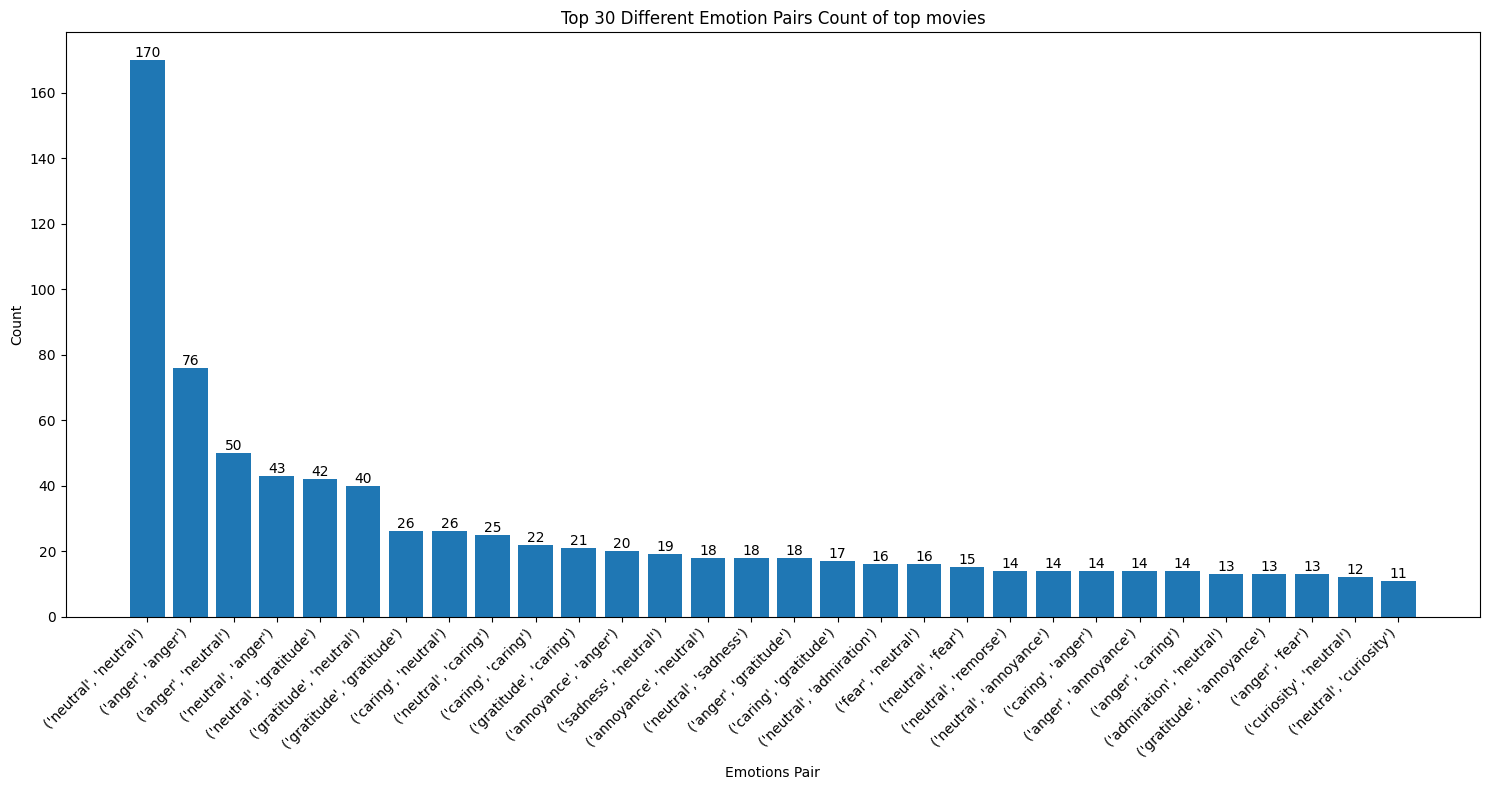

In [27]:
plot_bar_chart(a1_df_movies, 's', 'c', 'top')

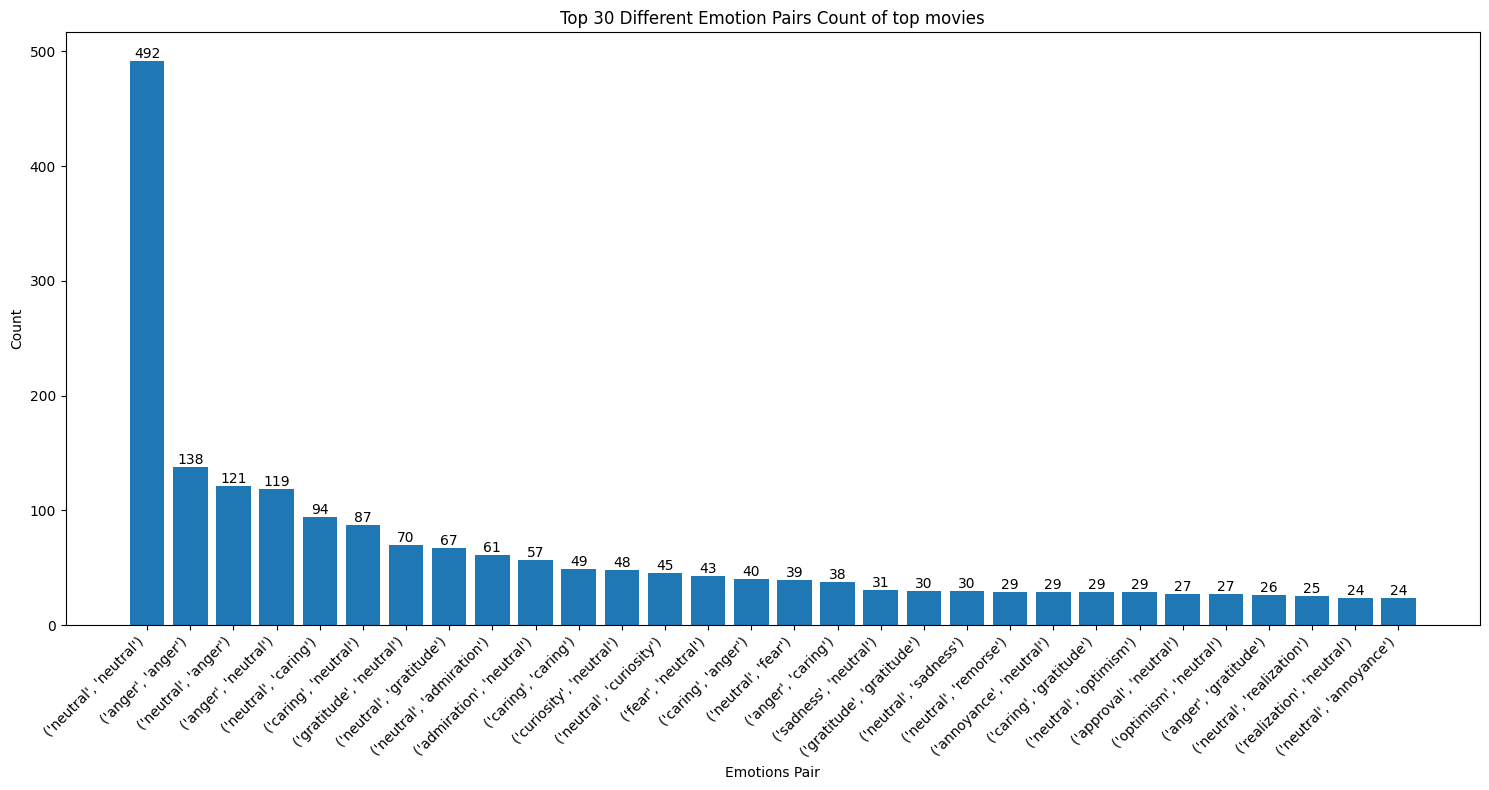

In [28]:
plot_bar_chart(a2_df_movies, 's', 'c', 'top')

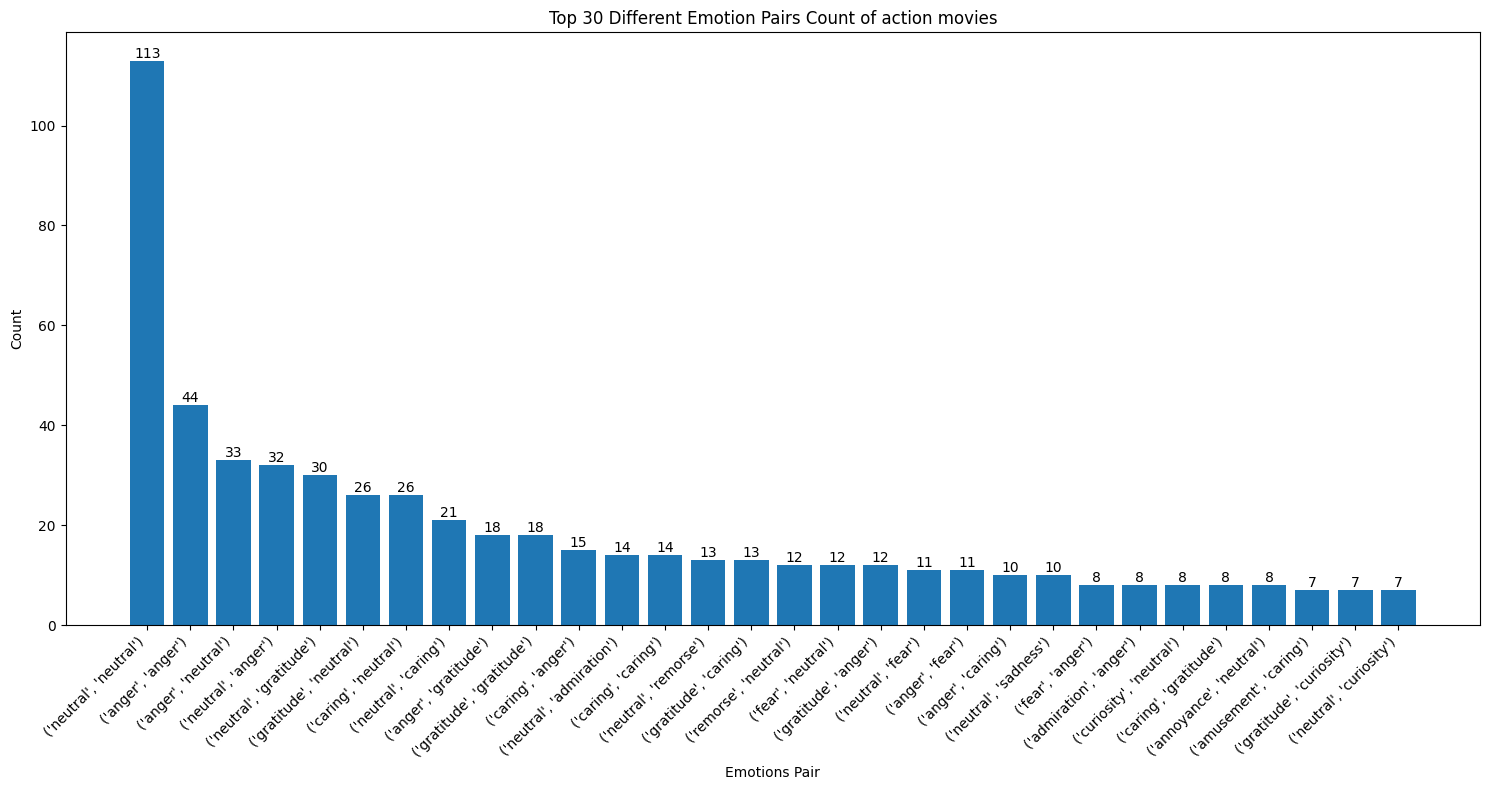

In [29]:
plot_bar_chart(a1_df_movies, 's', 'g', 'action')

# Scatter Plot of Different Emotions pairs across categories

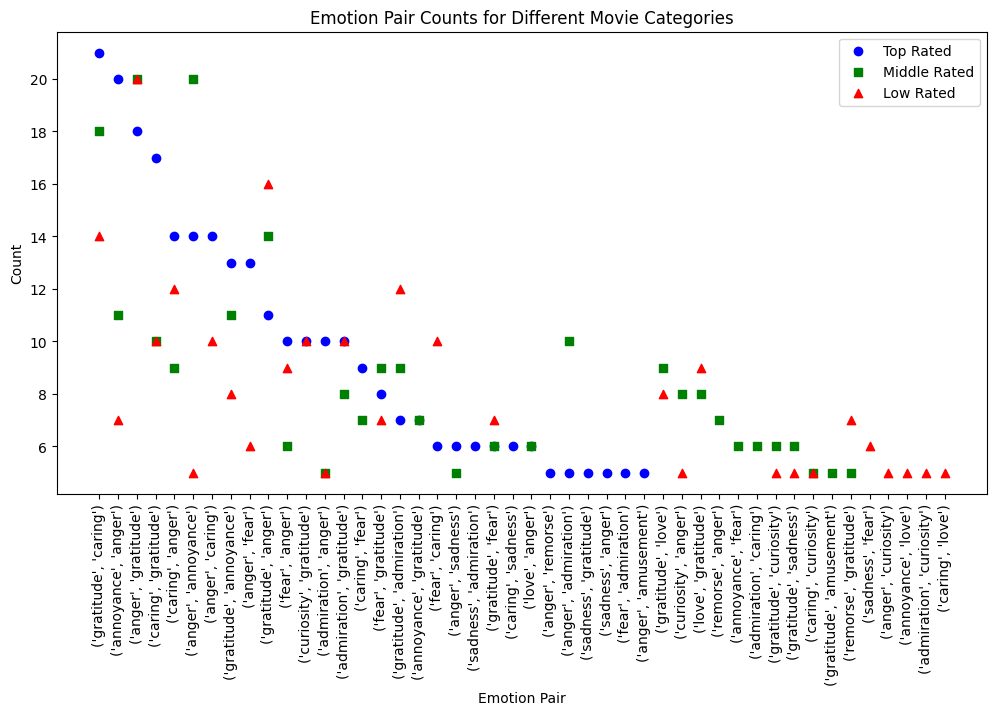

In [30]:
import matplotlib.pyplot as plt

def scatter_plot(category, color, marker, label):
    category_pairs = [str(pair[0]) for pair in category]
    category_counts = [pair[1] for pair in category]
    plt.scatter(category_pairs, category_counts, color=color, marker=marker, label=label)

top_30u = get_top_30_counts(category_dict_diffemopair(a1_df_movies, 'top'))
top_30m = get_top_30_counts(category_dict_diffemopair(a1_df_movies, 'middle'))
top_30l= get_top_30_counts(category_dict_diffemopair(a1_df_movies, 'lower'))
# Example usage:
plt.figure(figsize=(12, 6))  # Set the figure size

scatter_plot(top_30u, 'blue', 'o', 'Top Rated')
scatter_plot(top_30m, 'green', 's', 'Middle Rated')
scatter_plot(top_30l, 'red', '^', 'Low Rated')

plt.xlabel('Emotion Pair')
plt.ylabel('Count')
plt.title('Emotion Pair Counts for Different Movie Categories')
plt.xticks(rotation=90)
plt.legend()

plt.show()


In [31]:
import numpy as np

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def emo_matrix(df,s,c, name):
  if s == 's':
    if c == 'c':
      d = category_dict_emopair(df, name)
    elif c == 'g':
      d = genre_dict_emopair(df, name)
  elif s == 'd':
    if c == 'c':
      d = category_dict_diffemopair(df, name)
    elif c == 'g':
      d = genre_dict_diffemopair(df, name)

  emotions_dict = d.copy()

  # Extract unique emotions from the dictionary
  emotions_set = set()
  for key in emotions_dict.keys():
      emotions_set.add(key[0])
      emotions_set.add(key[1])
  emotions = sorted(list(emotions_set))

  # Initialize the matrix
  matrix = np.zeros((len(emotions), len(emotions)), dtype=float)

  # Calculate the sum of all values in the dictionary
  total_sum = sum(emotions_dict.values())

  # Populate the matrix
  for i, emotion1 in enumerate(emotions):
      for j, emotion2 in enumerate(emotions):
          value = emotions_dict.get((emotion1, emotion2), 0) / total_sum
          matrix[i][j] = value

  # Plot the matrix as an image
  fig, ax = plt.subplots(figsize=(20, 20))
  im = ax.imshow(matrix, cmap='hot')

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax)

  # Set the tick labels
  ax.set_xticks(np.arange(len(emotions)))
  ax.set_yticks(np.arange(len(emotions)))
  ax.set_xticklabels(emotions)
  ax.set_yticklabels(emotions)

  # Rotate the tick labels and set their alignment
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

  # Loop over data dimensions and create text annotations
  for i in range(len(emotions)):
      for j in range(len(emotions)):
          text = ax.text(j, i, '{:.2f}'.format(matrix[i, j]),
                          ha="center", va="center", color="w")

  # Set the title
  ax.set_title(f"Emotion Matrix of {name} movies")

  # Display the plot (optional)
  plt.show()



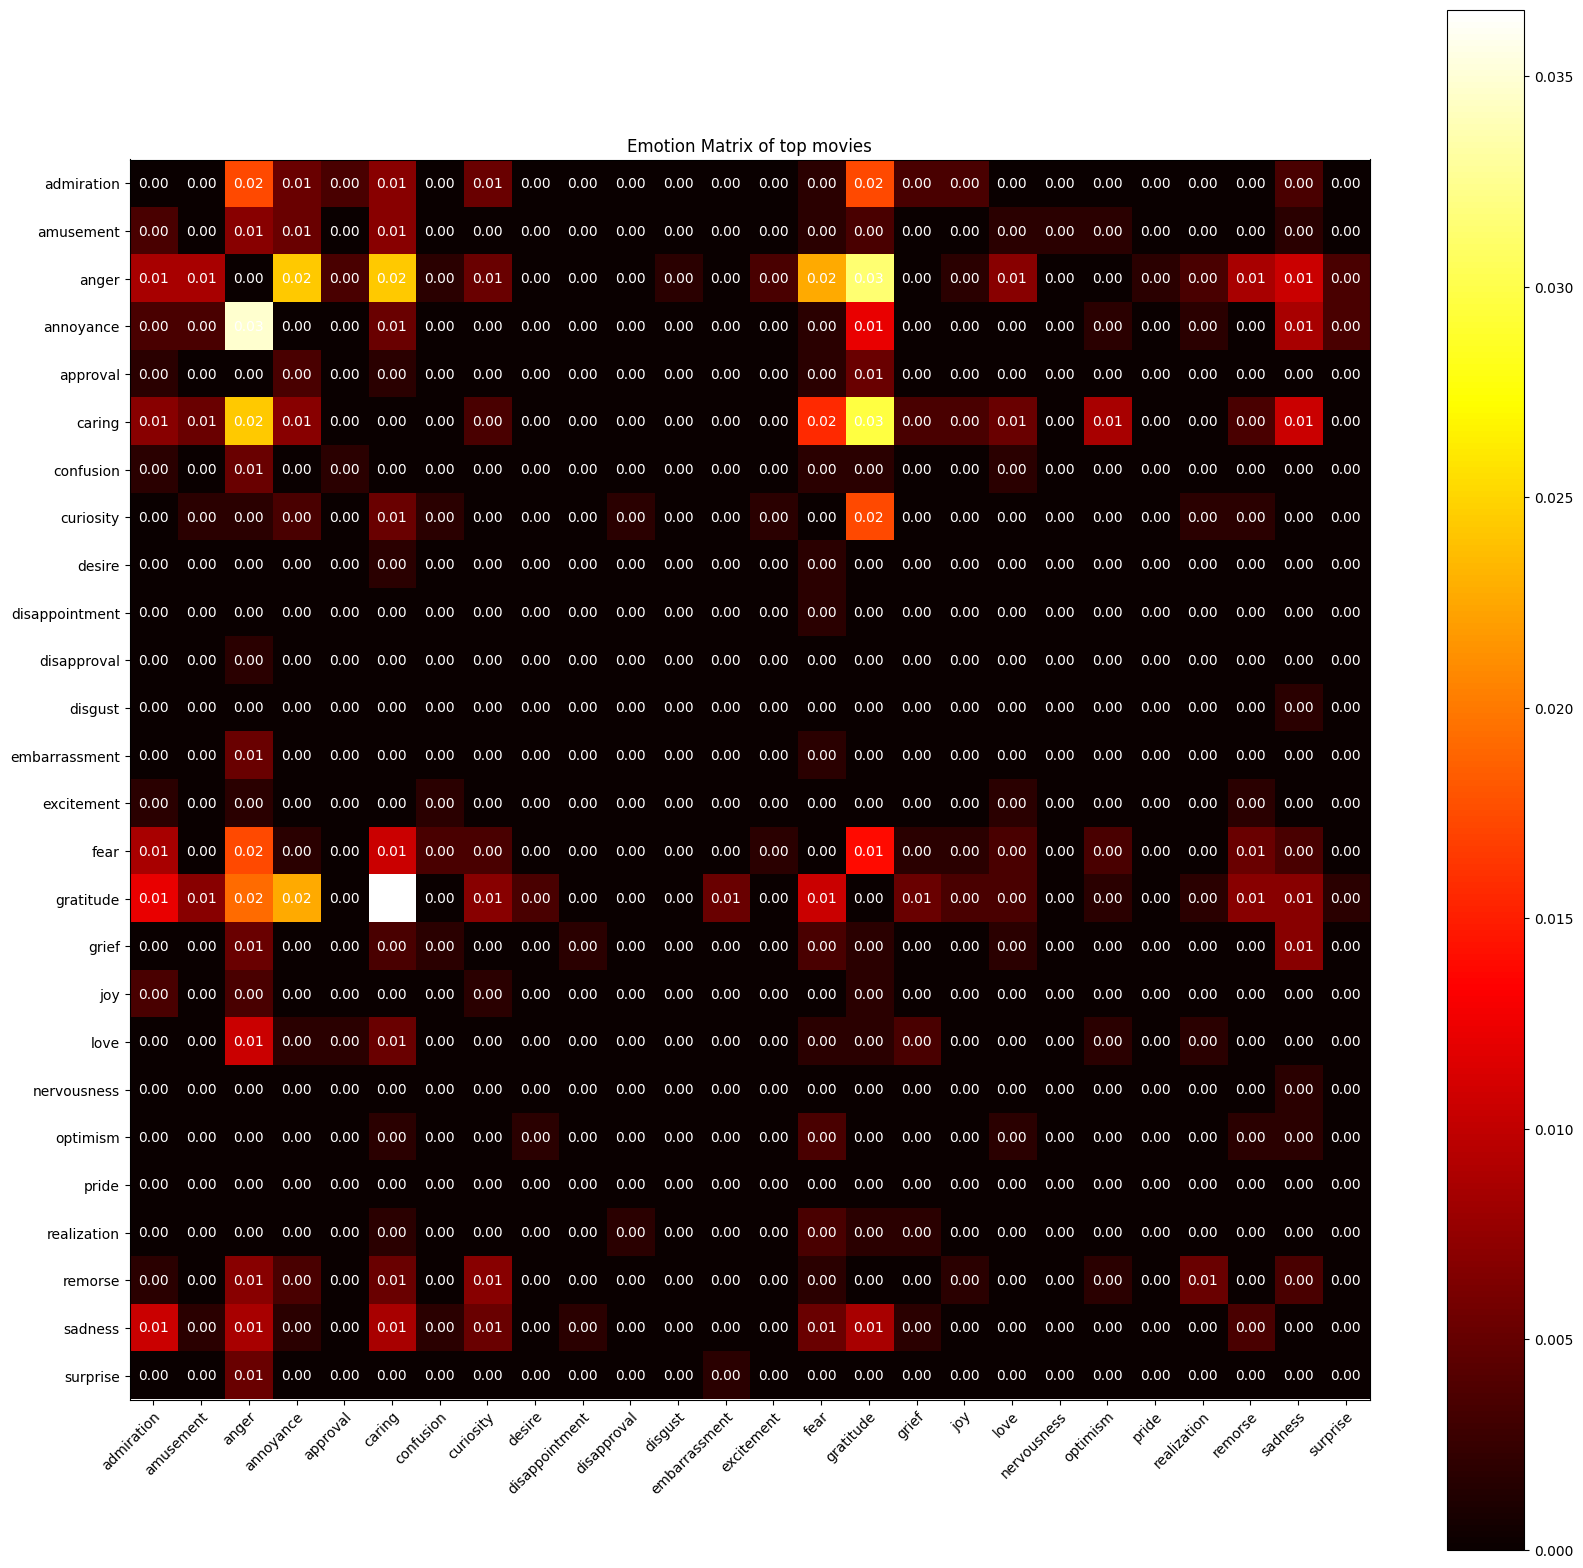

In [33]:
emo_matrix(a1_df_movies, 'd','c','top')

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def emo_matrix_new(df, s, c, name):
    if s == 's':
        if c == 'c':
            d = category_dict_emopair(df, name)
        elif c == 'g':
            d = genre_dict_emopair(df, name)
    elif s == 'd':
        if c == 'c':
            d = category_dict_diffemopair(df, name)
        elif c == 'g':
            d = genre_dict_diffemopair(df, name)

    emotions_dict = d.copy()
    # Extract unique emotions from the dictionary
    emotions_set = set()
    for key in emotions_dict.keys():
        emotions_set.add(key[0])
        emotions_set.add(key[1])
    emotions = sorted(list(emotions_set))

    # Initialize the matrix
    matrix = np.zeros((len(emotions), len(emotions)), dtype=float)

    # Calculate the sum of all values in the dictionary
    total_sum = sum(emotions_dict.values())

    # Populate the matrix
    for i, emotion1 in enumerate(emotions):
        for j, emotion2 in enumerate(emotions):
            value = emotions_dict.get((emotion1, emotion2), 0)
            row_sum = sum(emotions_dict.get((emotion1, other_emotion), 0) for other_emotion in emotions)
            if row_sum != 0:
                matrix[i][j] = (value / row_sum) * 100

    # Increase the size of each box in the matrix
    fig, ax = plt.subplots(figsize=(20, 20))
    im = ax.imshow(matrix, cmap='hot')

    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set the tick labels
    ax.set_xticks(np.arange(len(emotions)))
    ax.set_yticks(np.arange(len(emotions)))
    ax.set_xticklabels(emotions)
    ax.set_yticklabels(emotions)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(emotions)):
        for j in range(len(emotions)):
            text = ax.text(j, i, '{:.2f}%'.format(matrix[i, j]), ha="center", va="center", color="w")

    # Set the title
    ax.set_title("Emotion Matrix")

    # Save the figure as an image
    plt.savefig("emotion_matrix.png")

    # Display the plot (optional)
    plt.show()


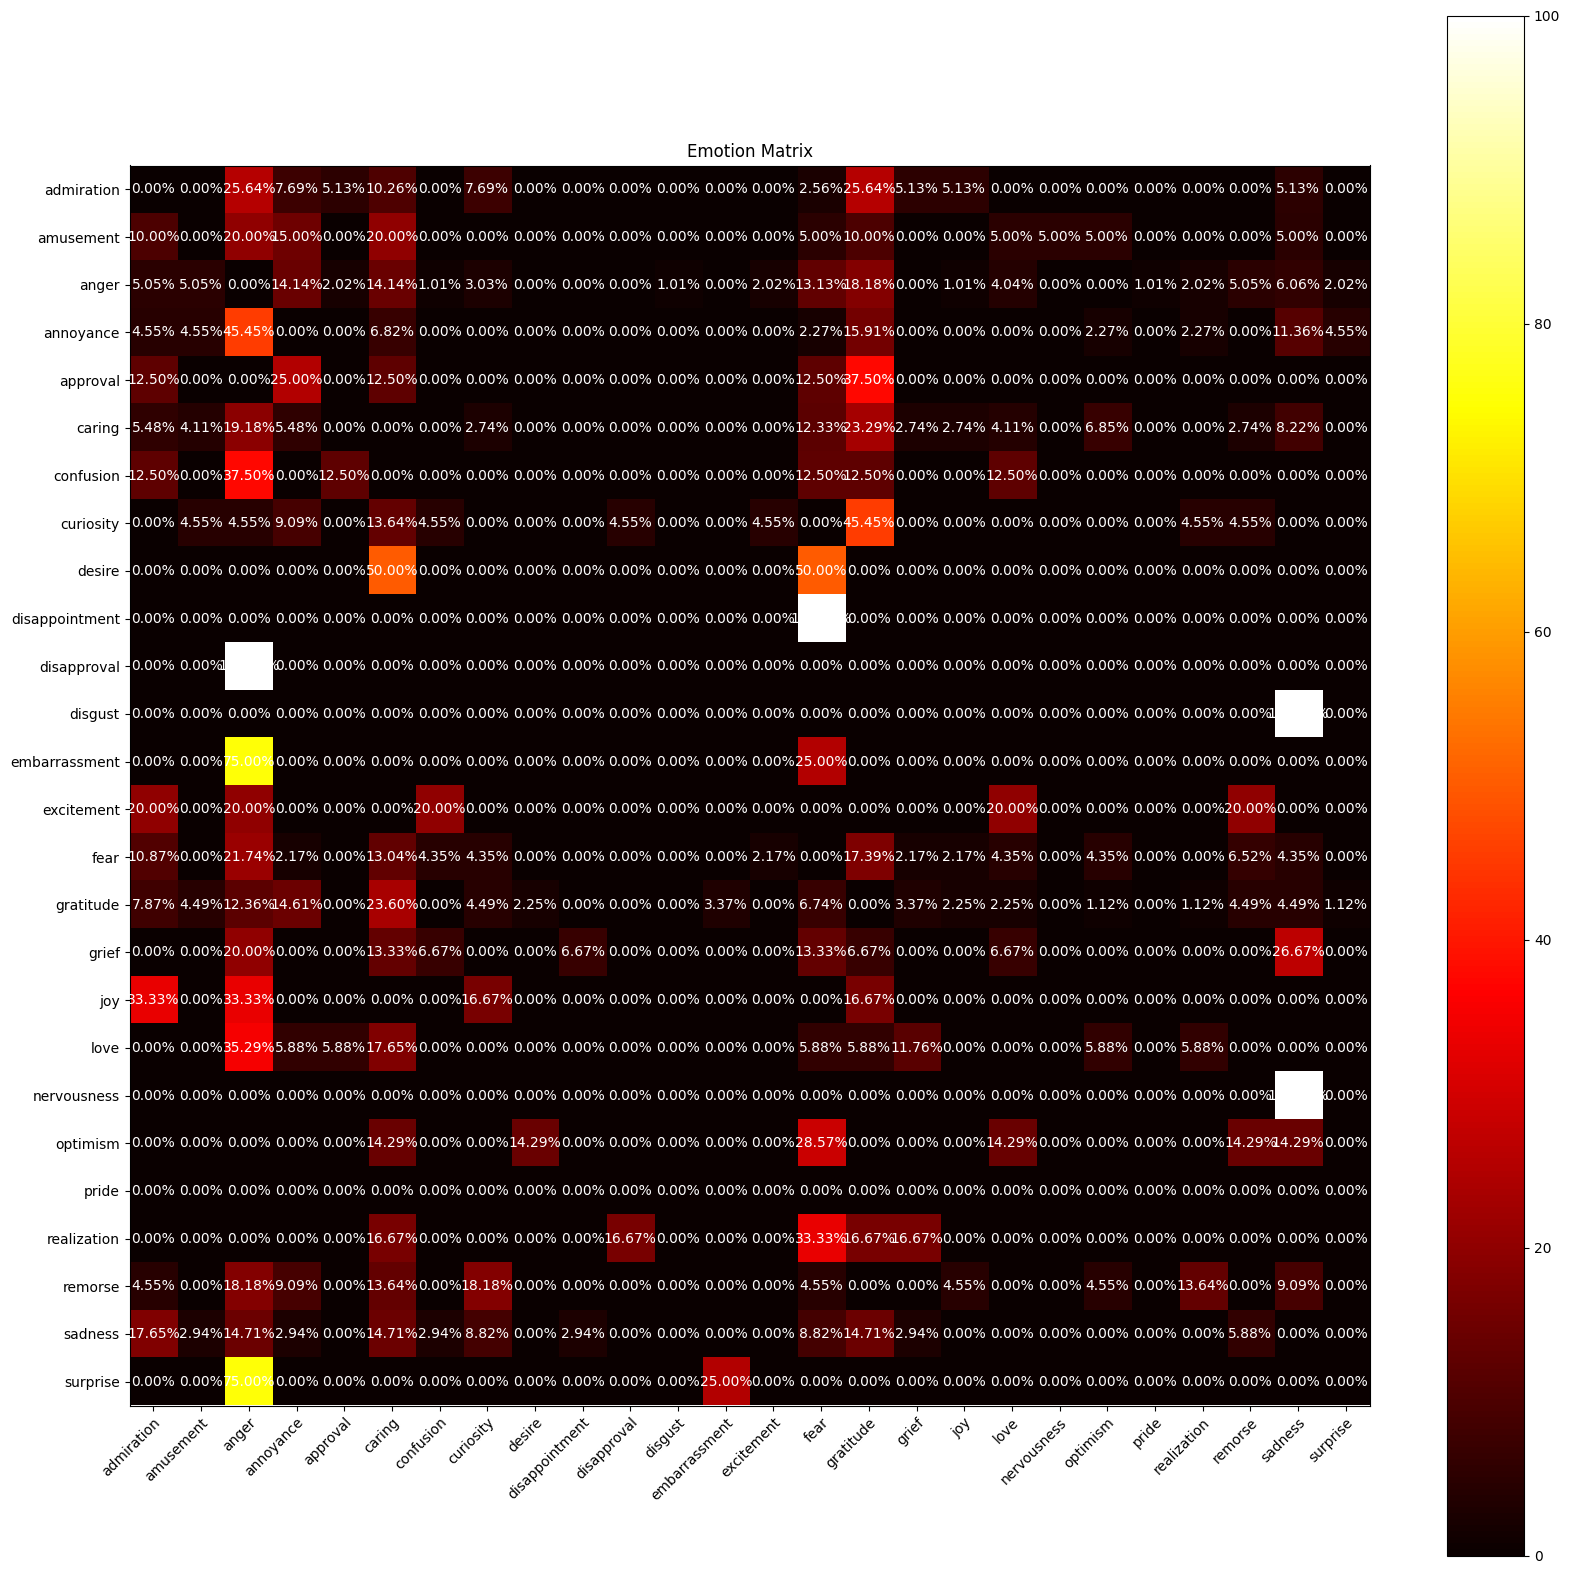

In [47]:
emo_matrix_new(a1_df_movies, 'd','c','top')

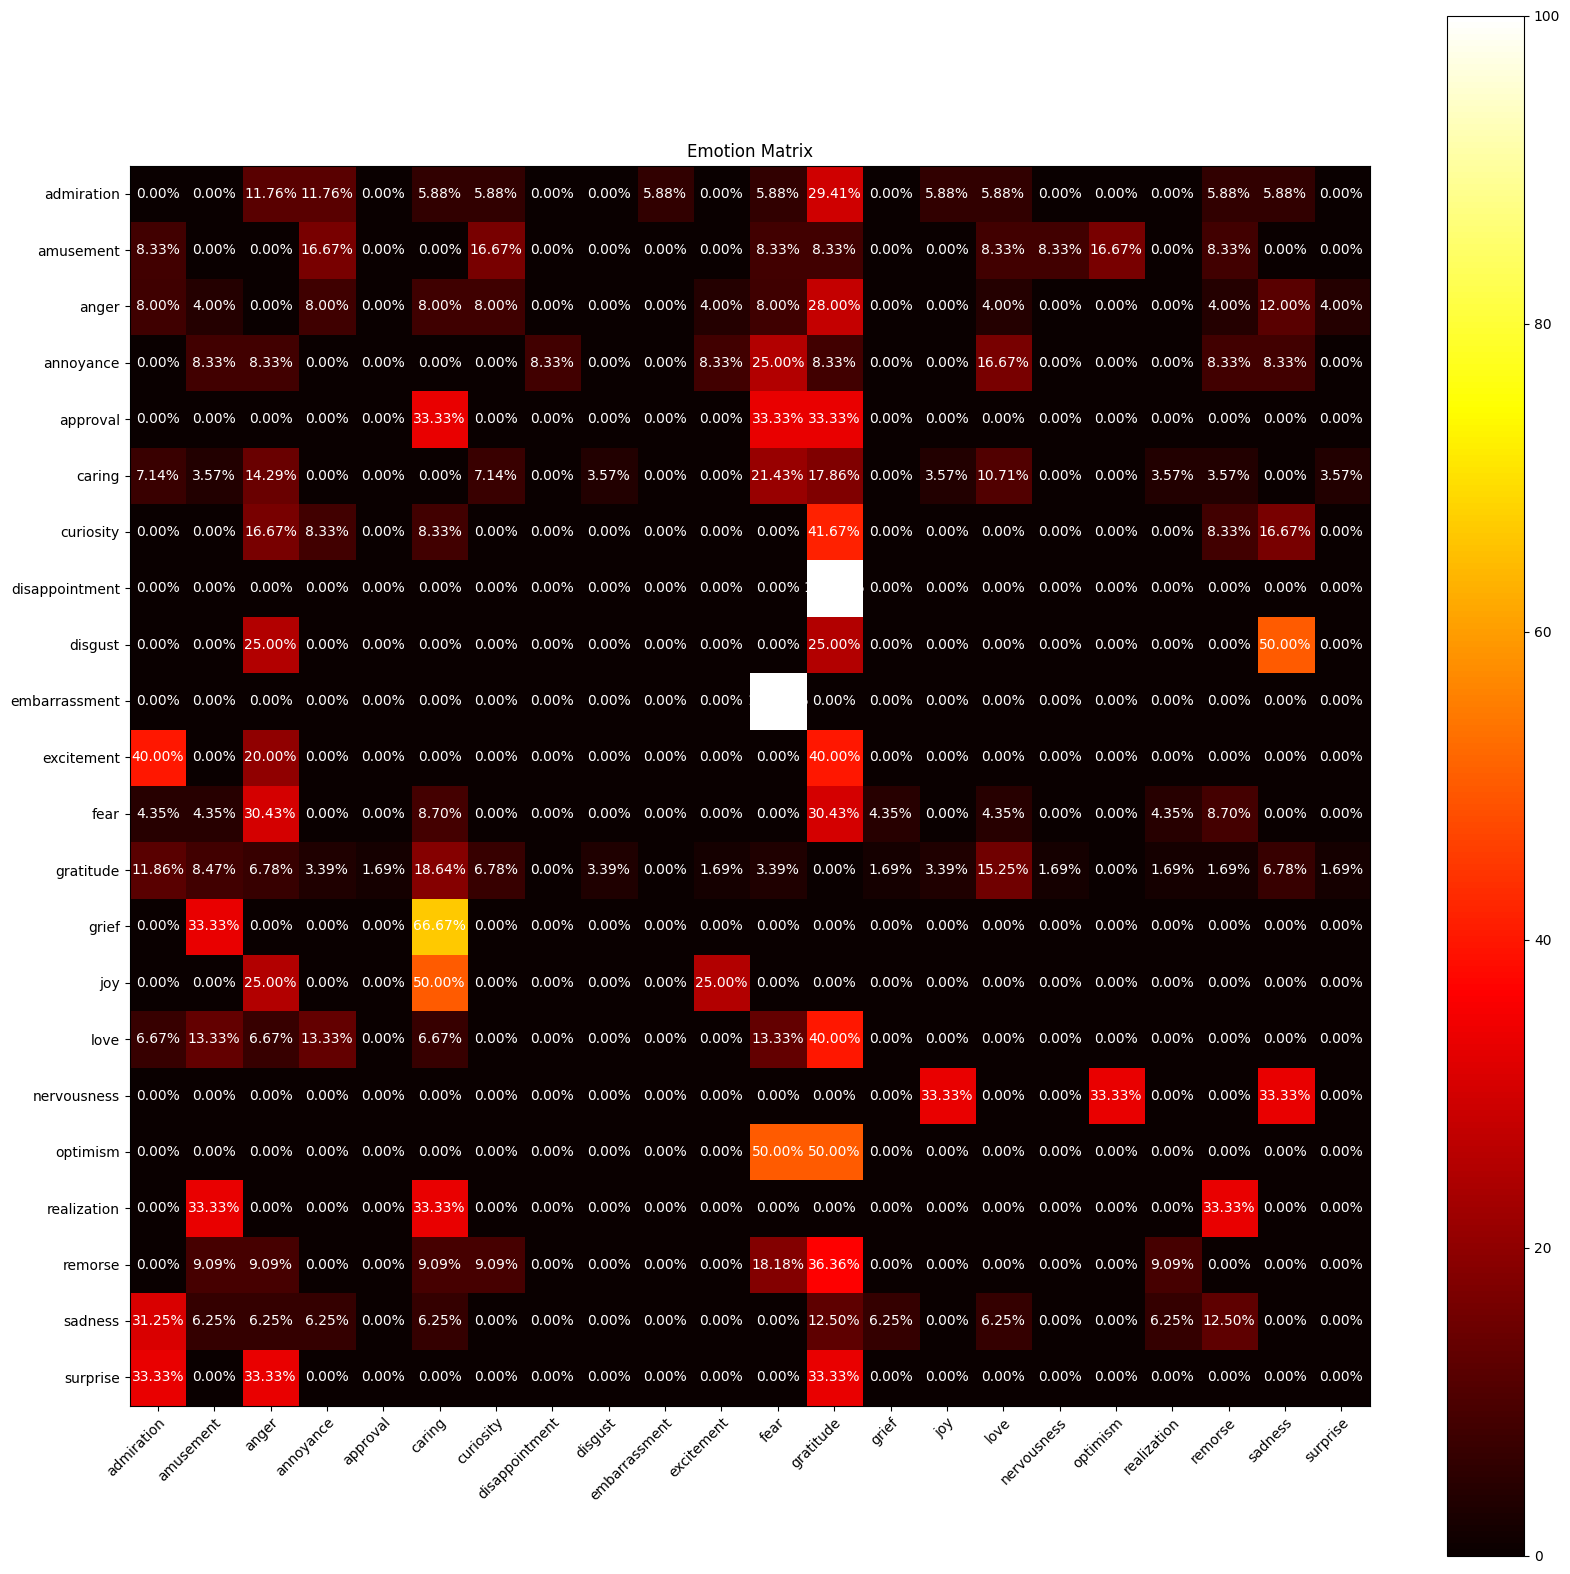

In [48]:
emo_matrix_new(a1_df_movies, 'd','g','romance')